In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load sample data (replace with your own time series data)
# Example data from statsmodels
from statsmodels.tsa.regime_switching.tests.test_markov_autoregression import rgnp

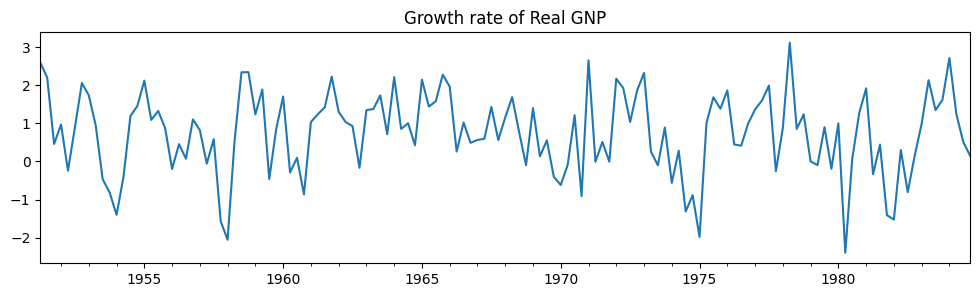

In [8]:

dta_hamilton = pd.Series(rgnp, index=pd.date_range('1951-04-01', '1984-10-01', freq='QS'))

# Plot the data to visualize potential regimes
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(12, 3))
plt.show()

<class 'pandas.core.series.Series'>
1951-04-01    2.593164
1951-07-01    2.202171
1951-10-01    0.458276
1952-01-01    0.968744
1952-04-01   -0.241308
                ...   
1983-10-01    1.615505
1984-01-01    2.709301
1984-04-01    1.244614
1984-07-01    0.508355
1984-10-01    0.148022
Freq: QS-JAN, Length: 135, dtype: float64
count    135.000000
mean       0.744598
std        1.070592
min       -2.391201
25%        0.034820
50%        0.890737
75%        1.425437
max        3.109565
dtype: float64
Total missing values: 0
Any missing: False


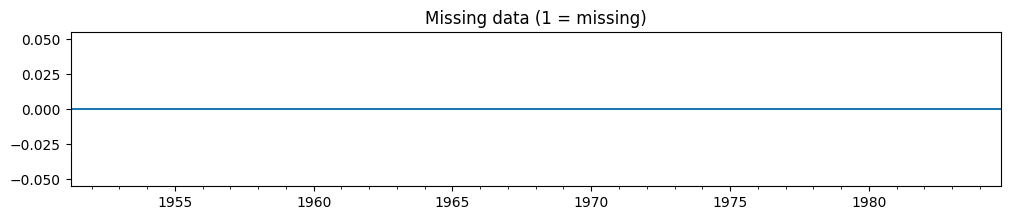

In [9]:
print(type(dta_hamilton))
print(dta_hamilton)
print(dta_hamilton.describe(include='all'))

# Missing data overview
print("Total missing values:", dta_hamilton.isna().sum())
print("Any missing:", dta_hamilton.isna().any())

# Indices with missing values (if any)
missing_idx = dta_hamilton.index[dta_hamilton.isna()]
if len(missing_idx) > 0:
    print("Missing at timestamps:", list(missing_idx))

# Visualize missingness as a boolean series
dta_hamilton.isna().astype(int).plot(title="Missing data (1 = missing)", figsize=(12, 2))
plt.show()

In [10]:
dta_hamilton.values

array([ 2.59316421,  2.20217133,  0.45827562,  0.9687438 , -0.24130757,
        0.89647478,  2.05393219,  1.73353648,  0.93871289, -0.46477833,
       -0.80983406, -1.39763689, -0.39886093,  1.1918416 ,  1.45620048,
        2.11808228,  1.08957863,  1.32390273,  0.87296367, -0.19773273,
        0.45420215,  0.07221876,  1.1030364 ,  0.82097489, -0.05795795,
        0.58447772, -1.56192672, -2.05041027,  0.53637183,  2.33676839,
        2.34014559,  1.2339263 ,  1.8869648 , -0.45920792,  0.84940469,
        1.70139849, -0.28756312,  0.09594627, -0.86080289,  1.03447127,
        1.23685944,  1.42004502,  2.22410631,  1.30210173,  1.03517699,
        0.9253425 , -0.16559951,  1.3444382 ,  1.37500131,  1.73222184,
        0.71605635,  2.21032143,  0.85333031,  1.00238776,  0.42725441,
        2.14368343,  1.43789184,  1.57959926,  2.27469826,  1.95962656,
        0.25992399,  1.01946914,  0.49016398,  0.5636338 ,  0.5959546 ,
        1.43082857,  0.56230122,  1.15388393,  1.68722844,  0.77

In [11]:
# Define the model
# Using Hamilton's specification: 2 regimes, AR(4) process, only the mean (intercept) switches
mod_hamilton = sm.tsa.MarkovAutoregression(
    dta_hamilton.values,
    k_regimes = 2,             # Number of regimes
    order = 4,                 # AR order
    switching_ar = False,      # AR coefficients are the same across regimes
    switching_variance = False # Variance is the same across regimes
)

# Fit the model using maximum likelihood estimation
# The .fit() method automatically finds good starting parameters via the EM algorithm
res_hamilton = mod_hamilton.fit()

# Print the model summary
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Fri, 28 Nov 2025   AIC                            380.527
Time:                          12:01:44   BIC                            406.404
Sample:                               0   HQIC                           391.042
                                  - 131                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1635      0.075     15.614      0.000       1.017       1.310
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5914      0.103      5.761      0.000       0.390       0.793
ar.L1          0.0135      0.120      0.112      0.911      -0.222       0.249
ar.L2         -0.0575      0.138     -0.418      0.676      -0.327       0.212
ar.L3         -0.2470      0.107     -2.310      0.021      -0.457      -0.037
ar.L4         -0.2129      0.111     -1.926      0.054      -0.430       0.004
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7547      0.097      7.819      0.000       0.565       0.944
p[1->0]        0.0959      0.038      2.542      0.011       0.022       0.170
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
# dta_hamilton.values


In [ ]:
print("\nTransition Probabilities:")
res_hamilton


Transition Probabilities:


In [ ]:
dta_hamilton.index[4:]

DatetimeIndex(['1952-04-01', '1952-07-01', '1952-10-01', '1953-01-01',
               '1953-04-01', '1953-07-01', '1953-10-01', '1954-01-01',
               '1954-04-01', '1954-07-01',
               ...
               '1982-07-01', '1982-10-01', '1983-01-01', '1983-04-01',
               '1983-07-01', '1983-10-01', '1984-01-01', '1984-04-01',
               '1984-07-01', '1984-10-01'],
              dtype='datetime64[ns]', length=131, freq='QS-JAN')

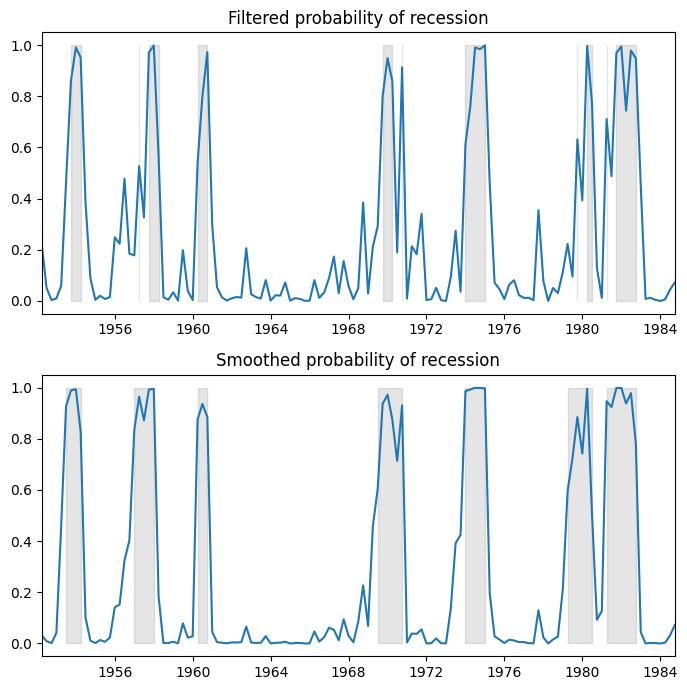

In [ ]:
fig, axes = plt.subplots(2, figsize=(7, 7))
ax = axes[0]
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(dta_hamilton.index[4:], 0, 1, where=(res_hamilton.filtered_marginal_probabilities[0] >= 0.5), color="k", alpha=0.1)
ax.set_xlim(dta_hamilton.index[4], dta_hamilton.index[-1])
ax.set(title="Filtered probability of recession")

ax = axes[1]
ax.plot(res_hamilton.smoothed_marginal_probabilities[0])
ax.fill_between(dta_hamilton.index[4:], 0, 1, where=(res_hamilton.smoothed_marginal_probabilities[0] >= 0.5), color="k", alpha=0.1)
ax.set_xlim(dta_hamilton.index[4], dta_hamilton.index[-1])
ax.set(title="Smoothed probability of recession")

fig.tight_layout()

In [ ]:
print(res_hamilton.expected_durations)


[ 4.07604792 10.42589263]


In [ ]:
print("\nTransition Probabilities:")
print(res_hamilton.regime_transition)


Transition Probabilities:
[[[0.75466432]
  [0.09591505]]

 [[0.24533568]
  [0.90408495]]]


In [ ]:
# View the estimated transition matrix
print("\nTransition Probabilities:")
print(res_hamilton.transition_matrix)

# View the expected duration of each regime
print("\nExpected Durations:")
print(res_hamilton.expected_durations)

# Plot the smoothed probabilities of being in the first regime (e.g., recession regime)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(res_hamilton.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of regime 0 (e.g., recession)")
plt.show()



Transition Probabilities:


AttributeError: 'MarkovAutoregressionResults' object has no attribute 'transition_matrix'

In [ ]:





dic_files = {
    'file01': {
        'filePath': ".",
        'fileName': "IBOV.csv",
        'saveFilePath': "./filled/",
        'saveFileName': "IBOV_filled.csv",
        'delimiter': ",",
        'decimal': ".",
        'parse_dates': ["Data"],
        'date_format': "%Y-%m-%d",
        'cols': ["Close"]
    }
} # end of dic_files

for key, config in dic_files.items():

    # check all necessary keys are present
    required_keys = ['filePath', 'fileName', 'saveFilePath', 'saveFileName', 'delimiter', 'decimal', 'parse_dates', 'date_format', 'cols']
    if not all(k in config for k in required_keys):
        print(f"Configuration for {key} is missing required keys.")
        continue

    # header = 0
    cols = config['cols']

    # Create full file path by joining directory and filename
    file_path = os.path.join(config['filePath'], config['fileName'])
    
    print(f"Processing file: {file_path}")

    # reading data
    try:
        df = pd.read_csv(file_path,
                            delimiter=config['delimiter'],
                            decimal=config['decimal'],
                            header=0,
                            parse_dates=config['parse_dates'],
                            date_format=config['date_format'])
    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
        continue
    except pd.errors.EmptyDataError:
        print(f"Error: File is empty: {file_path}")
        continue
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        continue


    # # Check if save directory exists, create if not
    # if not os.path.exists(config['saveFilePath']):
    #     os.makedirs(config['saveFilePath'])
    
   
    # save_path = os.path.join(config['saveFilePath'], config['saveFileName'])
    # try:
    #     # df.to_csv(save_path, index=False)
    #     print(f"Saved: {save_path}")
    # except PermissionError:
    #     print(f"Permission denied saving file: {save_path}")
    # except OSError as e:
    #     print(f"OS error saving file {save_path}: {e}")
    # except Exception as e:
    #     print(f"Unexpected error saving file {save_path}: {e}")





NameError: name 'os' is not defined